In [34]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [35]:
# Carregando os dados
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')['Diagnostico_Depressao']
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')['Diagnostico_Depressao']

In [36]:
# Verificando o balanceamento das classes
print(y_train.value_counts())
print(y_test.value_counts())

Diagnostico_Depressao
0.0    3383
1.0    3383
Name: count, dtype: int64
Diagnostico_Depressao
0.0    2004
1.0    2004
Name: count, dtype: int64


In [37]:
# Função para avaliação de modelos com validação cruzada
def evaluate_model(model, X, y, cv=5):
    """
    Avalia um modelo de machine learning usando validação cruzada.

    Args:
        model: O modelo de machine learning a ser avaliado.
        X: Os dados de entrada.
        y: Os dados de saída (labels).
        cv: Número de folds para validação cruzada (padrão: 5).

    Returns:
        Um dicionário com as métricas de avaliação (acurácia, precisão, revocação, F1-score, ROC AUC).
    """

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)  # Definindo o KFold
    results = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)  # Treinar o modelo em cada fold
        y_pred_fold = model.predict(X_test_fold)

        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        precision = precision_score(y_test_fold, y_pred_fold)
        recall = recall_score(y_test_fold, y_pred_fold)
        f1 = f1_score(y_test_fold, y_pred_fold)
        roc_auc = roc_auc_score(y_test_fold, y_pred_fold)

        results.append({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc
        })

    # Calculando as médias das métricas
    avg_results = {
        'accuracy': sum([r['accuracy'] for r in results]) / len(results),
        'precision': sum([r['precision'] for r in results]) / len(results),
        'recall': sum([r['recall'] for r in results]) / len(results),
        'f1': sum([r['f1'] for r in results]) / len(results),
        'roc_auc': sum([r['roc_auc'] for r in results]) / len(results)
    }

    return avg_results


## Arvore de Decisão 

In [38]:
#Modelo de Árvore de Decisão
print("## Árvore de Decisão ##")

# Definição dos parâmetros para otimização
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Otimização de parâmetros com RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Avaliação do modelo com validação cruzada
cv_results = evaluate_model(best_model, X_train, y_train)
print(f"Resultados da Validação Cruzada (Treinamento): {cv_results}")

# Predição com o melhor modelo
y_pred_dtc = best_model.predict(X_test)

# Avaliação do modelo no conjunto de teste
accuracy_tree = accuracy_score(y_test, y_pred_dtc)
precision_tree = precision_score(y_test, y_pred_dtc)
recall_tree = recall_score(y_test, y_pred_dtc)
f1_tree = f1_score(y_test, y_pred_dtc)
roc_auc_tree = roc_auc_score(y_test, y_pred_dtc)

## Árvore de Decisão ##
Resultados da Validação Cruzada (Treinamento): {'accuracy': 0.7490371525173558, 'precision': np.float64(0.7333851454701458), 'recall': np.float64(0.7806494113873511), 'f1': np.float64(0.7551696277379887), 'roc_auc': np.float64(0.7491236699590236)}


c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

In [39]:
# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia (Teste): {accuracy_tree:.4f}")
print(f"Precisão (Teste): {precision_tree:.4f}")
print(f"Revocação (Teste): {recall_tree:.4f}")
print(f"F1-Score (Teste): {f1_tree:.4f}")
print(f"ROC AUC (Teste): {roc_auc_tree:.4f}\n")

Melhores Parâmetros: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Acurácia (Teste): 0.7859
Precisão (Teste): 0.7609
Revocação (Teste): 0.8338
F1-Score (Teste): 0.7957
ROC AUC (Teste): 0.7859



Matriz de Confusão (Teste):
[[1479  525]
 [ 333 1671]]


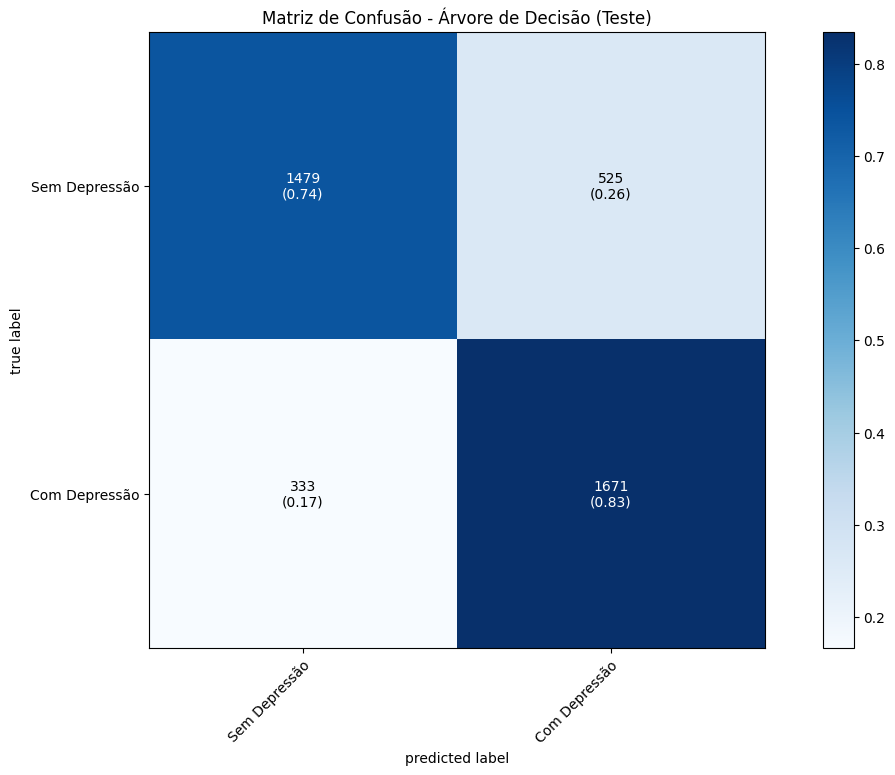

In [40]:
# Impressão da matriz de confusão
print("Matriz de Confusão (Teste):")
cm_tree = confusion_matrix(y_test, y_pred_dtc)
print(cm_tree)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm_tree, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Árvore de Decisão (Teste)')
plt.show()

In [41]:
# Imprimindo o PHI
A = 1013  # Verdadeiros positivos
B = 3588   # Falsos negativos
C = 303     # Falsos positivos
D = 10226    # Verdadeiros negativos

# Cálculo do coeficiente Phi
phi_dtc = (A * D - B * C) / np.sqrt((A + B) * (C + D) * (A + C) * (B + D))

print(f"Coeficiente Phi: {phi_dtc:.4f}")

Coeficiente Phi: 0.3124


In [42]:
# Impressão do relatório de classificação
print("Relatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_dtc))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78      2004
         1.0       0.76      0.83      0.80      2004

    accuracy                           0.79      4008
   macro avg       0.79      0.79      0.79      4008
weighted avg       0.79      0.79      0.79      4008



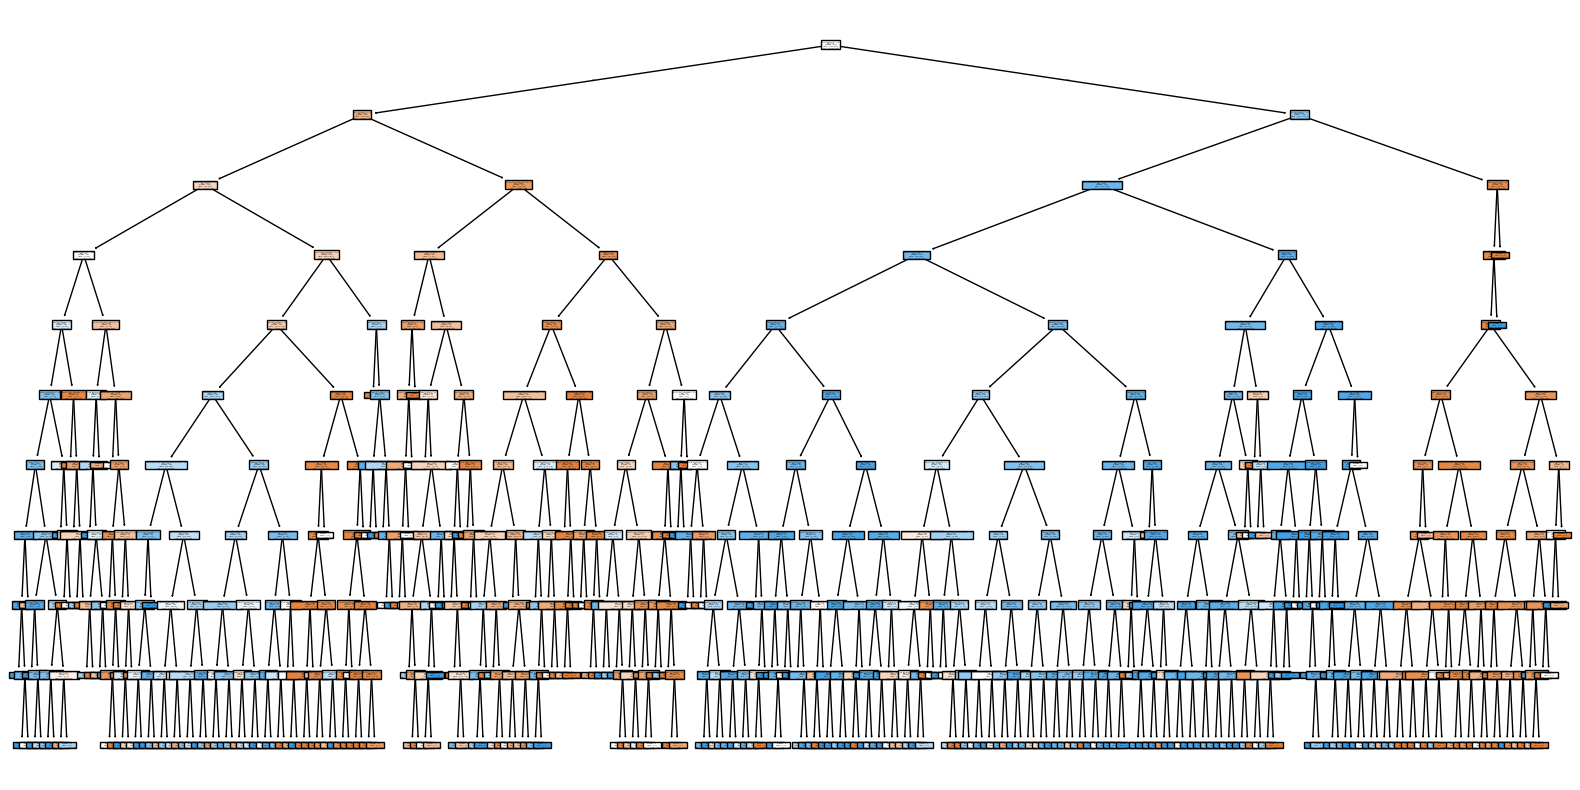

In [43]:
# Exibição da árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['Sem Depressão', 'Com Depressão'], filled=True)
plt.show()

In [44]:
# Obter a árvore treinada
tree_ = best_model.tree_

# Definir a função para extrair as regras
def get_tree_rules(tree_, feature_names):
    tree_rules = []

    def traverse_tree(node, rules=[]):
        if tree_.feature[node] != -2:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            if tree_.children_left[node] != -1:
                traverse_tree(tree_.children_left[node], rules + [f'{name} <= {threshold}'])
            if tree_.children_right[node] != -1:
                traverse_tree(tree_.children_right[node], rules + [f'{name} > {threshold}'])
        else:
            tree_rules.append((tree_.value[node], rules))

    traverse_tree(0)
    return tree_rules

# Extrair as regras da árvore treinada
tree_rules = get_tree_rules(tree_, X_train.columns)

# Imprimir as regras
for rule in tree_rules:
    value, conditions = rule
    print(f"Regra: {' and '.join(conditions)}")
    print(f"Predição: {value}")

Regra: Problemas_Sono <= 1.5 and sexo_masculino <= 0.5 and Consumo de Oleaginosas <= 1.5 and Consumo de Frutas <= 11.5 and doencas_cronicas <= 1.5 and frequencia_exercicio <= 5.5 and Apoio_Familiar <= 2.5 and Consumo de Carnes <= 11.5 and Consumo de Ovos <= 1.5
Predição: [[0. 1.]]
Regra: Problemas_Sono <= 1.5 and sexo_masculino <= 0.5 and Consumo de Oleaginosas <= 1.5 and Consumo de Frutas <= 11.5 and doencas_cronicas <= 1.5 and frequencia_exercicio <= 5.5 and Apoio_Familiar <= 2.5 and Consumo de Carnes <= 11.5 and Consumo de Ovos > 1.5 and Consumo de Carnes <= 7.5
Predição: [[0. 1.]]
Regra: Problemas_Sono <= 1.5 and sexo_masculino <= 0.5 and Consumo de Oleaginosas <= 1.5 and Consumo de Frutas <= 11.5 and doencas_cronicas <= 1.5 and frequencia_exercicio <= 5.5 and Apoio_Familiar <= 2.5 and Consumo de Carnes <= 11.5 and Consumo de Ovos > 1.5 and Consumo de Carnes > 7.5
Predição: [[0.5 0.5]]
Regra: Problemas_Sono <= 1.5 and sexo_masculino <= 0.5 and Consumo de Oleaginosas <= 1.5 and Cons

### Random Forest

In [45]:
# Modelo de Floresta Aleatória
print("## Floresta Aleatória ##")

# Definição dos parâmetros para otimização
params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Otimização de parâmetros com RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_model = random_search.best_estimator_

# Avaliação do modelo com validação cruzada
cv_results = evaluate_model(best_model, X_train, y_train)
print(f"Resultados da Validação Cruzada (Treinamento): {cv_results}")

## Floresta Aleatória ##


c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\maype\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Resultados da Validação Cruzada (Treinamento): {'accuracy': 0.8115593009025297, 'precision': np.float64(0.7609813710166244), 'recall': np.float64(0.9089859975951853), 'f1': np.float64(0.8283421437980236), 'roc_auc': np.float64(0.8115962929546623)}


In [46]:
# Predição com o melhor modelo
y_pred_rfc = best_model.predict(X_test)

# Avaliação do modelo no conjunto de teste
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rfc)

# Impressão dos resultados
print(f"Melhores Parâmetros: {random_search.best_params_}")
print(f"Acurácia (Teste): {accuracy_rfc:.4f}")
print(f"Precisão (Teste): {precision_rfc:.4f}")
print(f"Revocação (Teste): {recall_rfc:.4f}")
print(f"F1-Score (Teste): {f1_rfc:.4f}")
print(f"ROC AUC (Teste): {roc_auc_rfc:.4f}\n")

Melhores Parâmetros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Acurácia (Teste): 0.8258
Precisão (Teste): 0.7712
Revocação (Teste): 0.9266
F1-Score (Teste): 0.8418
ROC AUC (Teste): 0.8258



Matriz de Confusão (Teste):
[[1453  551]
 [ 147 1857]]


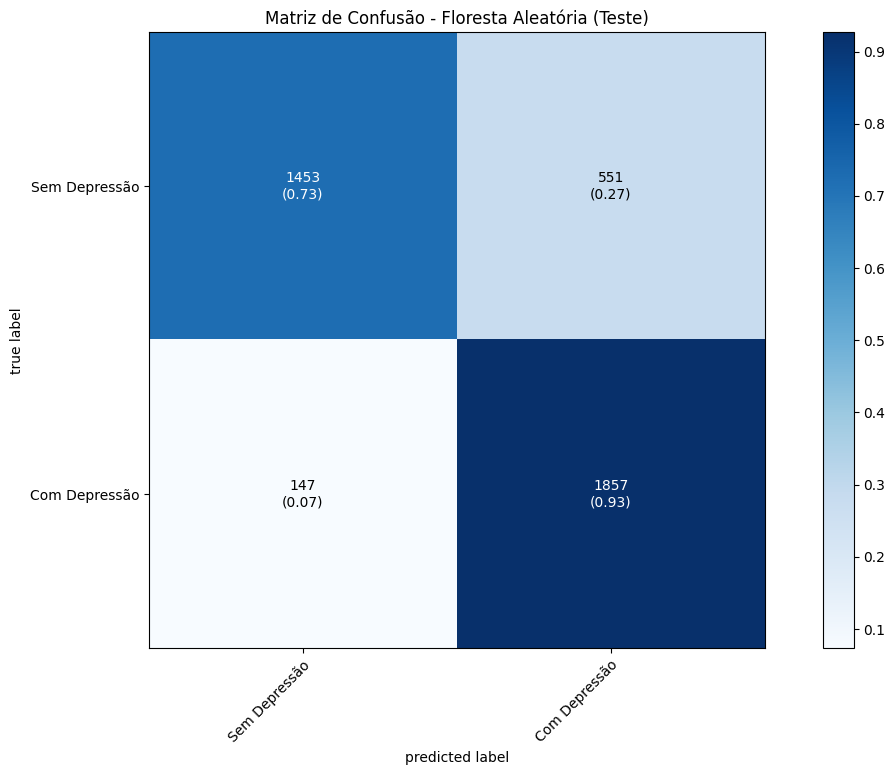

In [47]:
# Impressão da matriz de confusão
print("Matriz de Confusão (Teste):")
cm_forest = confusion_matrix(y_test, y_pred_rfc)
print(cm_forest)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm_forest, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Floresta Aleatória (Teste)')
plt.show()

In [48]:
# Imprimindo o PHI
A = 1225  # Verdadeiros positivos
B = 3849   # Falsos negativos
C = 91    # Falsos positivos
D = 9965   # Verdadeiros negativos

# Cálculo do coeficiente Phi
phi_rfc = (A * D - B * C) / np.sqrt((A + B) * (C + D) * (A + C) * (B + D))

print(f"Coeficiente Phi: {phi_rfc:.4f}")

Coeficiente Phi: 0.3893


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      2004
         1.0       0.77      0.93      0.84      2004

    accuracy                           0.83      4008
   macro avg       0.84      0.83      0.82      4008
weighted avg       0.84      0.83      0.82      4008



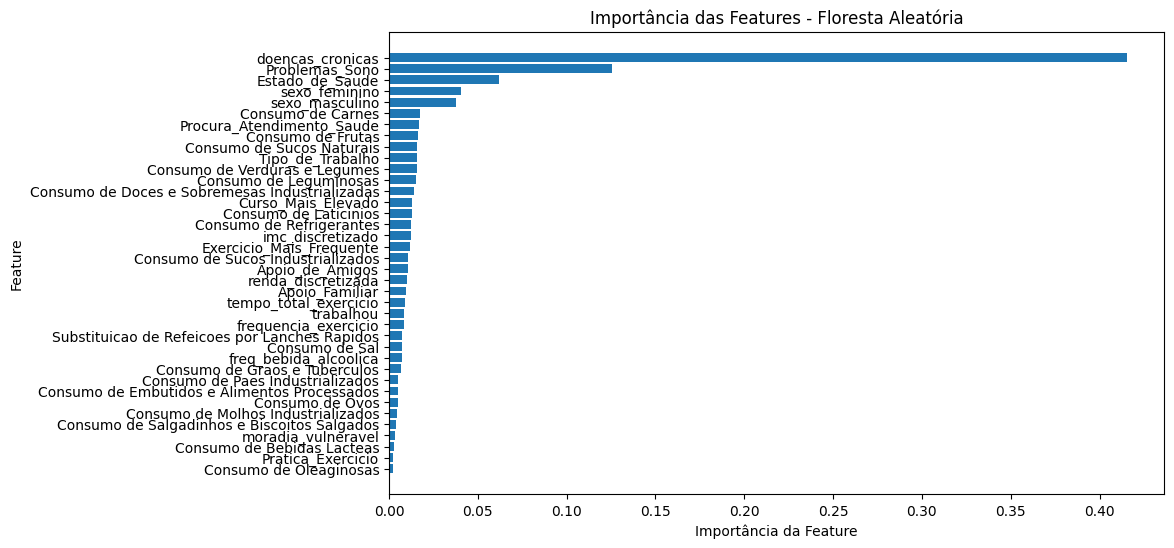

In [49]:
# Impressão do relatório de classificação
print("Relatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_rfc))

# Impressão das features mais importantes
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Importância da Feature')
plt.ylabel('Feature')
plt.title('Importância das Features - Floresta Aleatória')
plt.show()


### Naive Bayes

In [50]:
# Modelo Naive Bayes
print("## Naive Bayes ##")

# Criação do modelo
model = GaussianNB()

# Avaliação do modelo com validação cruzada
cv_results = evaluate_model(model, X_train, y_train)
print(f"Resultados da Validação Cruzada (Treinamento): {cv_results}")

# Treinamento do modelo
model.fit(X_train, y_train)

## Naive Bayes ##
Resultados da Validação Cruzada (Treinamento): {'accuracy': 0.8026895754387919, 'precision': np.float64(0.7740330853664809), 'recall': np.float64(0.8558795604752458), 'f1': np.float64(0.8126995024864166), 'roc_auc': np.float64(0.8027556139593093)}


GaussianNB()

In [51]:
# Predição com o modelo
y_pred_gnb = model.predict(X_test)

# Avaliação do modelo no conjunto de teste
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)

# Impressão dos resultados
print(f"Acurácia (Teste): {accuracy_gnb:.4f}")
print(f"Precisão (Teste): {precision_gnb:.4f}")
print(f"Revocação (Teste): {recall_gnb:.4f}")
print(f"F1-Score (Teste): {f1_gnb:.4f}")
print(f"ROC AUC (Teste): {roc_auc_gnb:.4f}\n")


Acurácia (Teste): 0.8044
Precisão (Teste): 0.7731
Revocação (Teste): 0.8618
F1-Score (Teste): 0.8150
ROC AUC (Teste): 0.8044



Matriz de Confusão (Teste):
[[1497  507]
 [ 277 1727]]


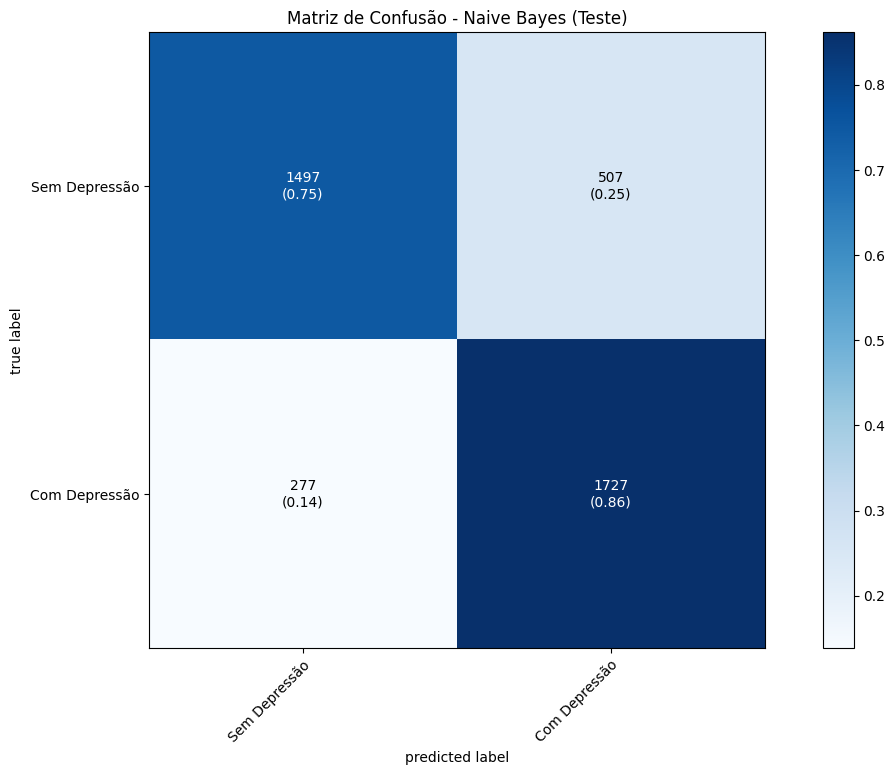

In [52]:
# Impressão da matriz de confusão
print("Matriz de Confusão (Teste):")
cm_naive = confusion_matrix(y_test, y_pred_gnb)
print(cm_naive)

# Plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=cm_naive, show_absolute=True, show_normed=True,
                                colorbar=True, class_names=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Naive Bayes (Teste)')
plt.show()

In [53]:
# Imprimindo o PHI
A = 1144  # Verdadeiros positivos
B = 3492   # Falsos negativos
C = 172   # Falsos positivos
D = 10322  # Verdadeiros negativos

# Cálculo do coeficiente Phi
phi_gnb = (A * D - B * C) / np.sqrt((A + B) * (C + D) * (A + C) * (B + D))

print(f"Coeficiente Phi: {phi_gnb:.4f}")

Coeficiente Phi: 0.3769


In [54]:
# Impressão do relatório de classificação
print("Relatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_gnb))

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      2004
         1.0       0.77      0.86      0.82      2004

    accuracy                           0.80      4008
   macro avg       0.81      0.80      0.80      4008
weighted avg       0.81      0.80      0.80      4008



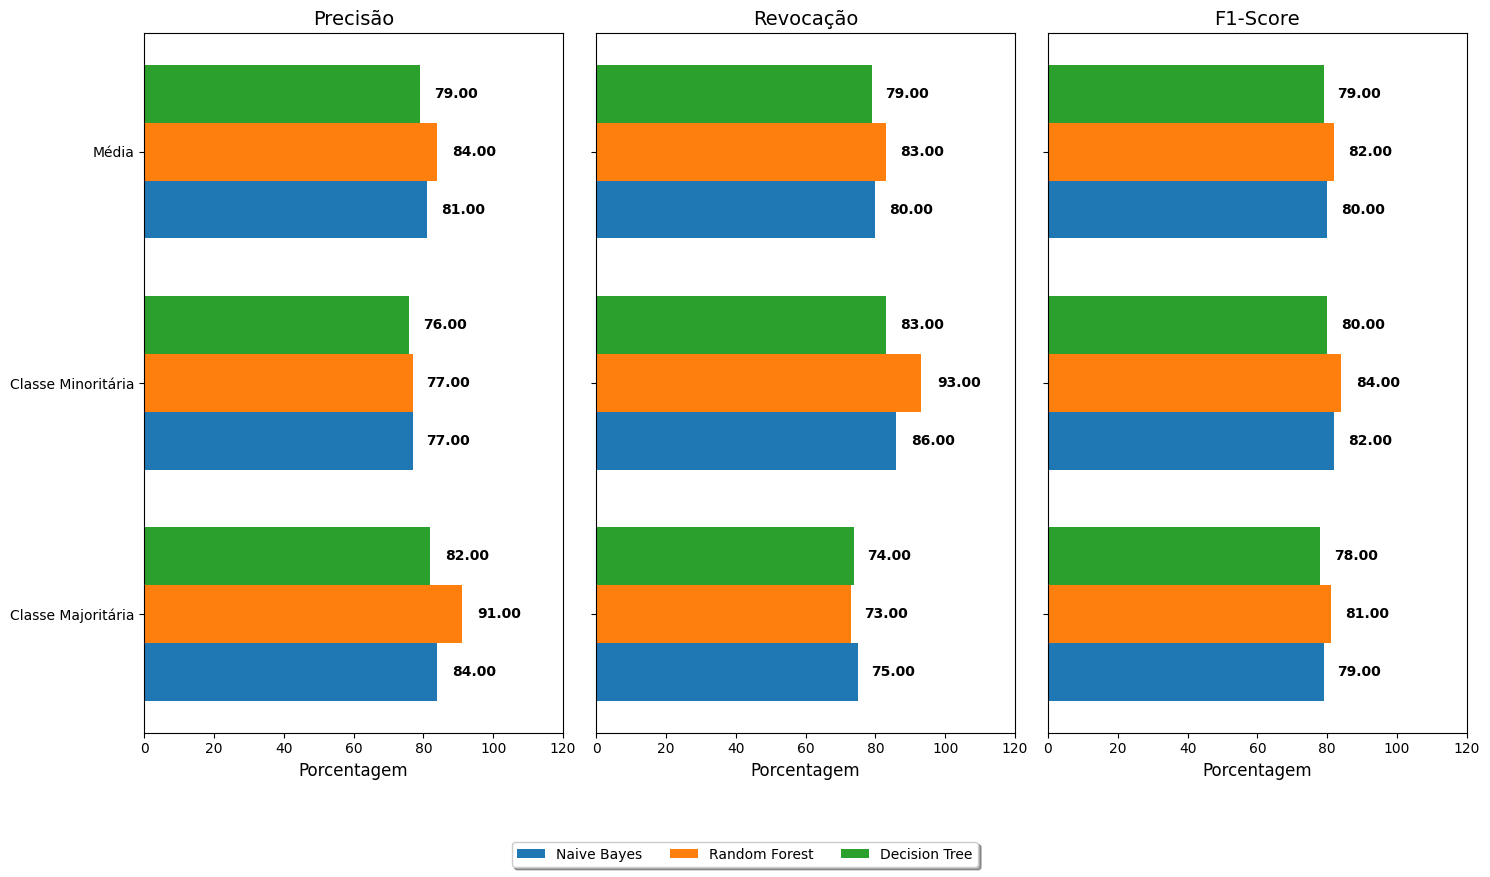

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def autolabel(ax, rects):
    """Adiciona rótulos de valor acima das barras."""
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ypos = rect.get_y() + height / 2
        ax.text(width + width * 0.05, ypos, f"{width:.2f}", ha='left', va='center', fontsize=10, color='black', weight='bold')

# Valores das métricas para cada modelo
naive_precision = [84.00, 77.00, 81.00]
random_forest_precision = [91.00, 77.00, 84.00]
decision_tree_precision = [82.00, 76.00, 79.00]

naive_recall = [75.00, 86.00, 80.00]
random_forest_recall = [73.00, 93.00, 83.00]
decision_tree_recall = [74.00, 83.00, 79.00]

naive_fmeasure = [79.00, 82.00, 80.00]
random_forest_fmeasure = [81.00, 84.00, 82.00]
decision_tree_fmeasure = [78.00, 80.00, 79.00]

# Definindo o número de colunas e o número de agrupamentos
number_columns = 3
number_groups = 3

# Definindo cores
naive_color = '#1f77b4'  # Azul
random_forest_color = '#ff7f0e'  # Laranja
decision_tree_color = '#2ca02c'  # Verde

# Definindo a largura das barras
barWidth = 0.25

# Espaçamento de um grupo no outro
espacamentoEntreGrupos = 1.0

# Aumentando o gráfico
plt.rcParams['figure.figsize'] = (15, 8)

fig, axs = plt.subplots(1, 3, sharey=True)

# Definindo as posições das barras
r1 = np.arange(number_columns) * espacamentoEntreGrupos
r2 = r1 + barWidth
r3 = r1 + 2 * barWidth

# Criando as barras e configurando os gráficos
labels = ['Classe Majoritária', 'Classe Minoritária', 'Média']

# Precision
label1 = axs[0].barh(r1, naive_precision, barWidth, color=naive_color, label='Naive Bayes')
label2 = axs[0].barh(r2, random_forest_precision, barWidth, color=random_forest_color, label='Random Forest')
label3 = axs[0].barh(r3, decision_tree_precision, barWidth, color=decision_tree_color, label='Decision Tree')

axs[0].set_xticks(np.arange(0, 140, 20))
axs[0].set_yticks(r1 + barWidth)
axs[0].set_yticklabels(labels)
axs[0].set_title('Precisão', fontsize=14)
axs[0].set_xlabel('Porcentagem', fontsize=12)

autolabel(axs[0], label1)
autolabel(axs[0], label2)
autolabel(axs[0], label3)

# Recall
label1 = axs[1].barh(r1, naive_recall, barWidth, color=naive_color, label='Naive Bayes')
label2 = axs[1].barh(r2, random_forest_recall, barWidth, color=random_forest_color, label='Random Forest')
label3 = axs[1].barh(r3, decision_tree_recall, barWidth, color=decision_tree_color, label='Decision Tree')

axs[1].set_xticks(np.arange(0, 140, 20))
axs[1].set_yticks(r1 + barWidth)
axs[1].set_yticklabels(labels)
axs[1].set_title('Revocação', fontsize=14)
axs[1].set_xlabel('Porcentagem', fontsize=12)

autolabel(axs[1], label1)
autolabel(axs[1], label2)
autolabel(axs[1], label3)

# F-Measure
label1 = axs[2].barh(r1, naive_fmeasure, barWidth, color=naive_color, label='Naive Bayes')
label2 = axs[2].barh(r2, random_forest_fmeasure, barWidth, color=random_forest_color, label='Random Forest')
label3 = axs[2].barh(r3, decision_tree_fmeasure, barWidth, color=decision_tree_color, label='Decision Tree')

axs[2].set_xticks(np.arange(0, 140, 20))
axs[2].set_yticks(r1 + barWidth)
axs[2].set_yticklabels(labels)
axs[2].set_title('F1-Score', fontsize=14)
axs[2].set_xlabel('Porcentagem', fontsize=12)

autolabel(axs[2], label1)
autolabel(axs[2], label2)
autolabel(axs[2], label3)

# Configurando a legenda
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=number_groups)

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.4)

# Adicionando título ao gráfico

plt.tight_layout()  # Ajusta o espaçamento entre os títulos

plt.savefig('comparacao_stylized.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


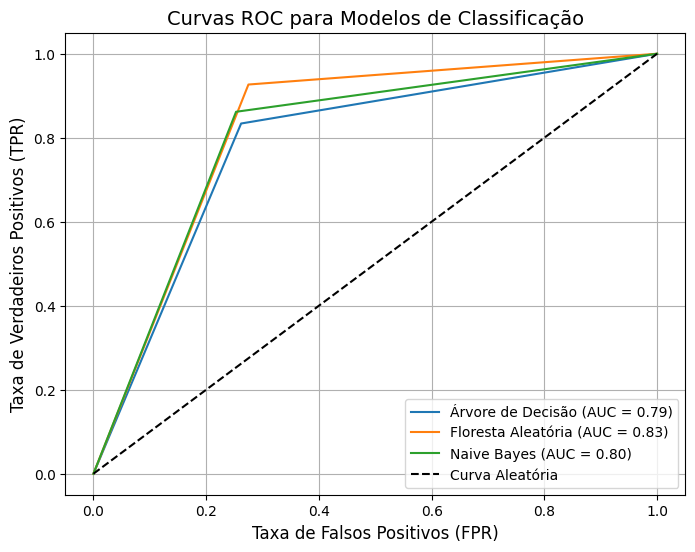

In [64]:
# Calculando as curvas ROC
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_dtc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_gnb)

# Calculando a área sob a curva ROC (AUC)
auc_dtc = roc_auc_score(y_test, y_pred_dtc)
auc_rfc = roc_auc_score(y_test, y_pred_rfc)
auc_gnb = roc_auc_score(y_test, y_pred_gnb)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(fpr_dtc, tpr_dtc, label=f'Árvore de Decisão (AUC = {auc_dtc:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Floresta Aleatória (AUC = {auc_rfc:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'Naive Bayes (AUC = {auc_gnb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Curva Aleatória')  # Linha tracejada para curva aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC para Modelos de Classificação', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)  # Adiciona grade ao gráfico

plt.show()

In [65]:
# Calcule as taxas para cada modelo
def calcular_taxas(cm):
    """Calcula as taxas de TP, TN, FP, FN a partir da matriz de confusão."""
    tn, fp, fn, tp = cm.ravel()
    
    # Calcula as taxas como porcentagens
    tp_rate = (tp / (tp + fn)) * 100 if (tp + fn) != 0 else 0
    tn_rate = (tn / (tn + fp)) * 100 if (tn + fp) != 0 else 0
    fp_rate = (fp / (fp + tn)) * 100 if (fp + tn) != 0 else 0
    fn_rate = (fn / (fn + tp)) * 100 if (fn + tp) != 0 else 0
    
    return tp_rate, tn_rate, fp_rate, fn_rate

# Calcule as taxas para cada modelo
tp_tree, tn_tree, fp_tree, fn_tree = calcular_taxas(cm_tree)
tp_forest, tn_forest, fp_forest, fn_forest = calcular_taxas(cm_forest)
tp_naive, tn_naive, fp_naive, fn_naive = calcular_taxas(cm_naive)

# Imprima as taxas
print(f"Árvore de Decisão: TP: {tp_tree:.2f}%, TN: {tn_tree:.2f}%, FP: {fp_tree:.2f}%, FN: {fn_tree:.2f}%")
print(f"Floresta Aleatória: TP: {tp_forest:.2f}%, TN: {tn_forest:.2f}%, FP: {fp_forest:.2f}%, FN: {fn_forest:.2f}%")
print(f"Naive Bayes: TP: {tp_naive:.2f}%, TN: {tn_naive:.2f}%, FP: {fp_naive:.2f}%, FN: {fn_naive:.2f}%")

Árvore de Decisão: TP: 83.38%, TN: 73.80%, FP: 26.20%, FN: 16.62%
Floresta Aleatória: TP: 92.66%, TN: 72.50%, FP: 27.50%, FN: 7.34%
Naive Bayes: TP: 86.18%, TN: 74.70%, FP: 25.30%, FN: 13.82%


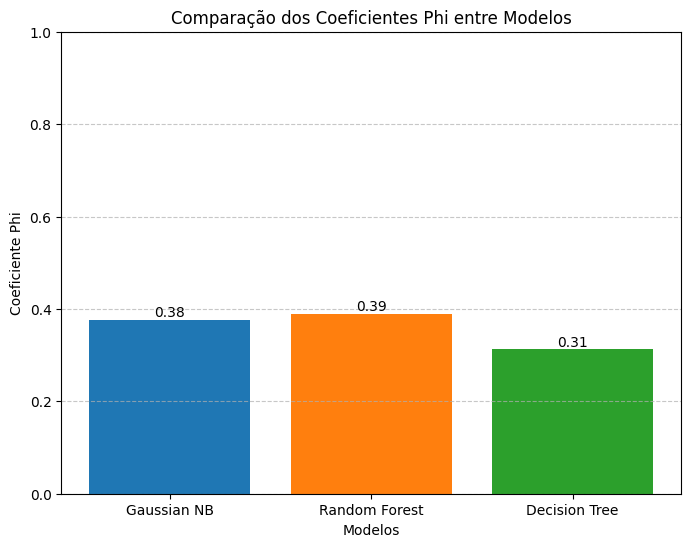

In [66]:
model_names = ['Gaussian NB', 'Random Forest', 'Decision Tree']

# Valores dos coeficientes Phi
phi_values = [phi_gnb, phi_rfc, phi_dtc]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, phi_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Modelos')
plt.ylabel('Coeficiente Phi')
plt.title('Comparação dos Coeficientes Phi entre Modelos')
plt.ylim(0, 1)  # Defina o intervalo do eixo y de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()